# Fitness classes  |  Do you book and go?

GoalZone is a fitness club chain in Canada and offers a range of fitness classes.

Some classes are always fully booked and often have a low attendance rate.

GoalZone wants to increase the number of spaces available for classes by predicting whether the member will attend the class or not.

## Preprocessing and Exploratory Data Analysis

### Dataset load and Dataframe creation

In [ ]:
# Initial imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

# Note: when session run out of time, you should re-load file to be read
from google.colab import files

uploaded = files.upload()


Saving fitness_class_2212.csv to fitness_class_2212.csv


### Pandas DataFrame

Building DataFrame from the dataset.

In [ ]:
# Read the CSV file as pandas dataframe
df = pd.read_csv("fitness_class_2212.csv")

### Exploration: Examining the Data

In [ ]:
# View the first n rows
df.head(10)

# View the last n rows
# df.tail(10)

# Head and tail of the DF
# print(df)  # or just df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


Variables into details:
- months_as_member: number of months as this fitness club member, minimum 1 month. [int]
- weight: member's weight in kg, rounded to 2 decimal places. [float]
- days_before: number of days before the class the member registered. [int]
- day_of_week: day of the week of the class. [cat]
- time: time of day of the class. Either AM or PM. [cat]
- category: category of the fitness class. [cat]
- attended: whether the member attended the class (1) or not (0). [cat]


In [ ]:
# Info about dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


*Descriptive statistics* of the data.

In [ ]:
# Overview of df, with some stat values
df.describe(percentiles=[0.1, 0.9])

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
10%,150.900000,5.000000,68.328000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
90%,1350.100000,29.000000,99.933000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [ ]:
# See correlation among numerical variables in the dataframe
df.corr(numeric_only=True)

#_ = sb.heatmap(df.corr(numeric_only=True), annot=True, cmap="YlGnBu")

,booking_id,months_as_member,weight,attended
booking_id,1.000000,0.007612,-0.009800,0.026693
months_as_member,0.007612,1.000000,-0.467120,0.485526
weight,-0.009800,-0.467120,1.000000,-0.285241
attended,0.026693,0.485526,-0.285241,1.000000


Some variables show a level of correlation among them, both direct and indirect:
- weight decreases with both "months as member" and "attendance" growing.
- Attendance grows with months as member.

### Drop useless columns

In [ ]:
# Delete the first column
df = df.drop(columns=['booking_id'])  # or using: del df['booking_id'] or df.drop(['booking_id'], axis=1)

# Rows, columns
df.shape

(1500, 7)

Since the first column in the dataframe doesn't add any information, I've deleted it.

Moreover this column can hide duplicated records (rows).

In dataset there are 1500 observations with 7 variables recorded each.

### Duplicates

In [ ]:
# Count how many rows are duplicated
print(f"\nTotal number of duplicated records: {df.duplicated().sum()}")

duplicate_mask = df.duplicated(keep=False)
# Print the duplicate rows
print(df[duplicate_mask])

# In case there are some repeated records they're deleted
df.drop_duplicates(inplace=True)
df.shape



Total number of duplicated records: 1
      months_as_member  weight days_before day_of_week time category  attended
781                 10     NaN           5         Tue   PM     HIIT         0
1363                10     NaN           5         Tue   PM     HIIT         0


(1499, 7)

Considering there is just one duplicate compared to the dataset size, I decided to discard it since there is no much information lost.

#### Duplicates without target

In [ ]:
# Count how many rows are duplicated
df_duplicates = df.drop('attended', axis = 1)
print(f"\nTotal number of duplicated records: {df_duplicates.duplicated().sum()}")

# In case there are some repeated records they're deleted
df.drop_duplicates(subset=df_duplicates, inplace=True)
df.shape


Total number of duplicated records: 0


(1499, 7)

### Missing data

In [ ]:
# Check out if are there missing data
print(f"\nNumber of missin data per column:\n{df.isna().sum()}\n")  # or df.isnull().sum()
print(df[df.isnull().any(axis=1)].head())


def missing_data_handler(df, delete=True):

    if delete:
        # Delete rows with missing values
        df.dropna(inplace=True)

    else:
        # Fill missing values with the mean value of the respective column to not lose info
        for col in df.columns:
            if df[col].dtype != 'object':  # Check if the column is numeric
                mean_value = df[col].mean()
                df[col].fillna(mean_value, inplace=True)

    return df

missing_data_handler(df, delete=False)

df.shape


Number of missin data per column:
months_as_member     0
weight              19
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

     months_as_member  weight days_before day_of_week time category  attended
114                14     NaN          10         Fri   AM     HIIT         0
211                16     NaN          10         Fri   AM  Cycling         0
315                 5     NaN          14         Sun   AM     HIIT         0
366                 4     NaN           2         Mon   AM     Aqua         0
482                14     NaN           1         Mon   PM     Aqua         0


(1499, 7)

### Visualizing Features and Target
Plot to study the distribution of features and target values.

#### Count of variables

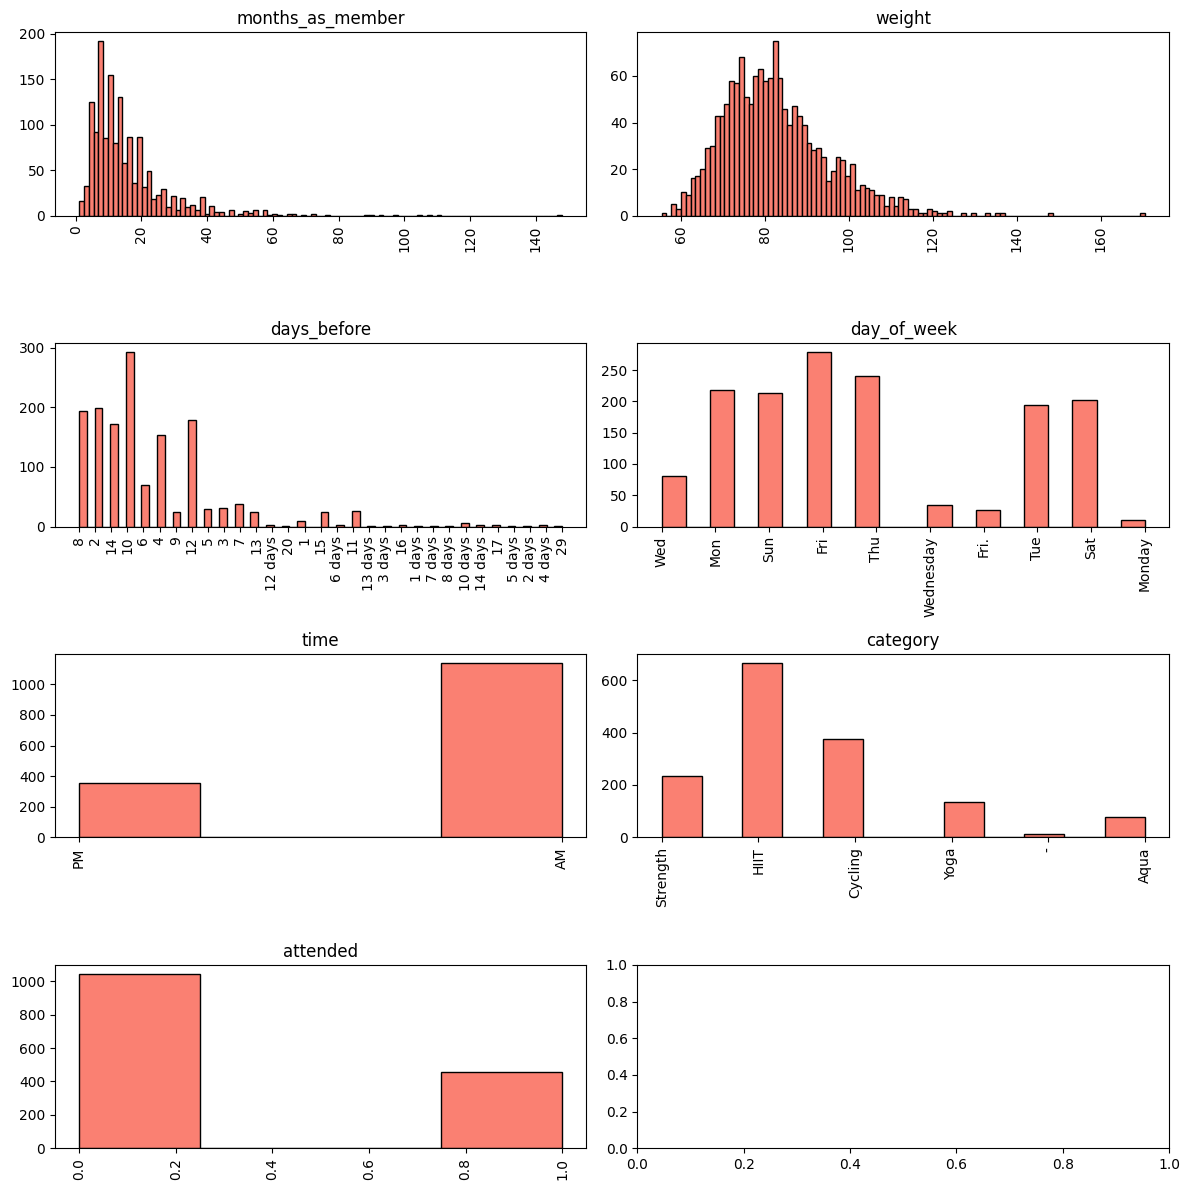

In [ ]:
def plot_dist(df, variables):

    num_plots = len(variables)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed

    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 12), sharex=False, sharey=False)  # not sharing x or y
    axs = axs.flatten()

    for i in range(num_plots):

        num_unique_values = df[df.columns[i]].nunique() * 2

        if num_unique_values > 100:
          num_unique_values = 100

        axs[i].hist(df[df.columns[i]], bins=num_unique_values, color='salmon', edgecolor='black')  # per valori discreti meglio barplot, più allineato con lables
        axs[i].set_title(variables[i])
        axs[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


plot_dist(df, df.columns)

Very unbalanced dataset considering "attended", "days_of_week", am vs pm, HITT vs other.

Moreover some values are accounted as different, but they're the same, for example: wednesday = wed, monday = mon, fri. = fri or 8 days = 8, etc.

Weight and months as member have gaussian distribution with sort of long right tail.

## Data Engineering

Perform a binary classification problem of predicting if a person goes to the class or not after booking.

In [ ]:
# Convert some values which are not consistent

# Split the values and keep only the first part, which is numerical, e.g. "8 days" --> "8", and convert to numeric
df['days_before'] = df['days_before'].str.split(" ").str[0].astype(int)


# Define a dictionary for replacements
replacements = {"Monday": "Mon",
                "Wednesday": "Wed",
                "Fri.": "Fri"}

for old_value, new_value in replacements.items():
  df['day_of_week'] = df['day_of_week'].str.replace(old_value, new_value)

#df['day_of_week_fabio'] = df['day_of_week'].apply(lambda x: replacements[x] if x in replacements.keys() else x)

<ipython-input-96-62b70d02a53e>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['day_of_week'] = df['day_of_week'].str.replace(old_value, new_value)


In [ ]:
unique_categories = df['day_of_week_fabio'].unique()
print(unique_categories)

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


In [ ]:
unique_categories = df['category'].unique()
print(unique_categories)


def filter1(df, delete=False):

  if delete:
    df = df[(df['category'] != '-') & (df['category'] != 'Other')]  # to eliminate unknown category of sport class

  else:
    df['category'] = df['category'].replace('-', 'Other') # to replace unknown category of sport class with "Other"

  return df  # must return df, if not it will be modified only inside the function


df = filter1(df, delete=False)

print(df.shape)

print(df['category'].value_counts())

df.iloc[-4:-2, :]  # integers locations

['Strength' 'HIIT' 'Cycling' 'Yoga' 'Other' 'Aqua']
(1499, 7)
HIIT        666
Cycling     376
Strength    233
Yoga        135
Aqua         76
Other        13
Name: category, dtype: int64


,months_as_member,weight,days_before,day_of_week,time,category,attended
1496,29,89.55,2,Mon,AM,Strength,0
1497,9,87.38,4,Tue,AM,HIIT,0


In [ ]:
# Sort the DataFrame
df = df.sort_values(by='days_before', ascending=False)


### Filter data: cleaning from outliers

In [ ]:
# Exclude peculiar cases of very high or very low of a specific value, outliers

feature_names = ['months_as_member', 'weight', 'days_before']

for col in feature_names:

  # Q1 = df[col].quantile(0.25)
  # Q3 = df[col].quantile(0.75)
  # IQR = Q3 - Q1
  # df = df[(df[col] > (Q1 - 1.5 * IQR)) | (df[col] < (Q3 + 0.0 * IQR))]

  # Qinf_sal = df[col].quantile(0.10)
  Qsup_sal = df[col].quantile(0.99)  # Removing about 1% of the excessively high values by eyeballing seems like a good balance between information loss and outliers

  # print(f"{col} range: {Qinf_sal} - {Qsup_sal}")
  print(f"{col} max: {Qsup_sal:.1f}\n")

  # filter by outliers
  # df = df[(df[col] >= Qinf_sal) & (df[col] <= Qsup_sal)]
  df = df[df[col] <= Qsup_sal]

df.shape

months_as_member max: 65.0

weight max: 118.9

days_before max: 15.0



(1462, 7)

### Visualization of clean DataFrame

In [ ]:
# Let's first define a list containing the left-most extreme of each bin
# bins = [0, 60, 70, 80, 90, 100, 110, 120]
# bins = [0, 60, 80, 100, 120]
bins = [0, 60, 70, 80, 90, 100, 120]

labels = ['< 60 Kg', '< 70 Kg', '< 80 Kg', '< 90 Kg', '< 100 Kg', '100+ Kg']

df['weight_ranges'] = pd.cut(df['weight'], bins=bins, labels=labels, right=False)

df

,months_as_member,weight,days_before,day_of_week,time,category,attended,weight_ranges
931,11,114.870000,15,Sun,PM,HIIT,0,100+ Kg
905,5,83.850000,15,Fri,PM,Strength,1,< 90 Kg
305,10,81.980000,15,Sun,PM,HIIT,0,< 90 Kg
775,25,84.040000,15,Sun,PM,Cycling,0,< 90 Kg
917,7,90.710000,15,Sun,PM,Aqua,1,< 100 Kg
...,...,...,...,...,...,...,...,...
482,14,82.610378,1,Mon,PM,Aqua,0,< 90 Kg
443,16,74.090000,1,Mon,PM,Cycling,1,< 80 Kg
1190,30,69.490000,1,Mon,PM,HIIT,1,< 70 Kg
348,38,72.880000,1,Mon,PM,HIIT,0,< 80 Kg


In [ ]:
bins = [0, 12, 24, 36, 48, 65]

labels = ['< 1 year', '< 2 years', '< 3 years', '< 4 years', '4+ years']

df['months_as_member_ranges'] = pd.cut(df['months_as_member'], bins=bins, labels=labels)
# df['months_as_member_ranges'] = pd.cut(df['months_as_member'], bins=10)

df

,months_as_member,weight,days_before,day_of_week,time,category,attended,weight_ranges,months_as_member_ranges
931,11,114.870000,15,Sun,PM,HIIT,0,100+ Kg,< 1 year
905,5,83.850000,15,Fri,PM,Strength,1,< 90 Kg,< 1 year
305,10,81.980000,15,Sun,PM,HIIT,0,< 90 Kg,< 1 year
775,25,84.040000,15,Sun,PM,Cycling,0,< 90 Kg,< 3 years
917,7,90.710000,15,Sun,PM,Aqua,1,< 100 Kg,< 1 year
...,...,...,...,...,...,...,...,...,...
482,14,82.610378,1,Mon,PM,Aqua,0,< 90 Kg,< 2 years
443,16,74.090000,1,Mon,PM,Cycling,1,< 80 Kg,< 2 years
1190,30,69.490000,1,Mon,PM,HIIT,1,< 70 Kg,< 3 years
348,38,72.880000,1,Mon,PM,HIIT,0,< 80 Kg,< 4 years


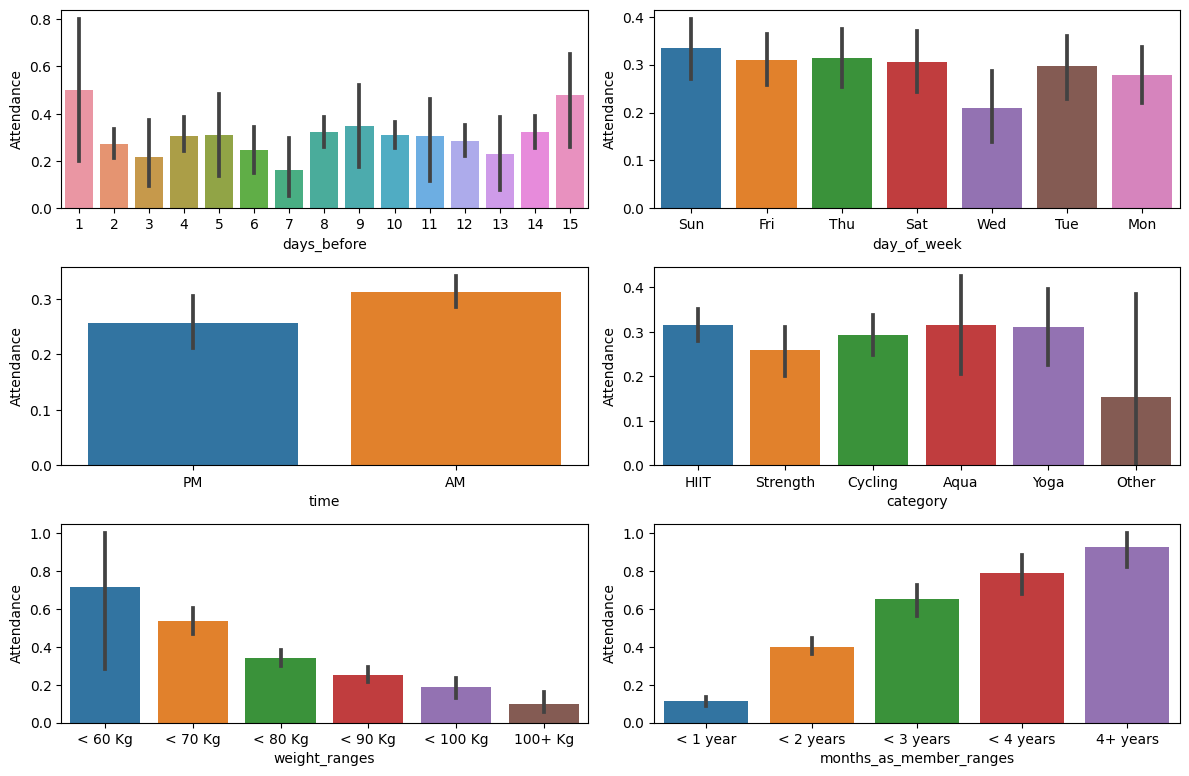

In [ ]:
def trend_plots(df, columns):
    num_plots = len(columns) - 2  # not counting attended (target) and weight (resolution too high to be readable)
    num_rows = (num_plots + 1) // 2  # Calculate the number of rows needed
    plt.figure(figsize=(12, 10))
    i = 0

    for col in columns:

      if col not in ['attended', 'weight', 'months_as_member']:

        plt.subplot(num_rows, 2, i+1)
        sb.barplot(x=col, y='attended', data=df)
        plt.xticks(rotation=0)
        plt.xlabel(col)
        plt.ylabel('Attendance')
        i += 1

    plt.tight_layout()
    plt.show()


trend_plots(df, df.columns)

Considering graphs above, there are some tendencies:
- weight vs attendance goes down
- attendance grows with months as memeber

This can lead to operative choice of make the booking of loyal users (the ones with more months as member) affordable.


Moreover "other" classes have significant less attendance in respect with the specific ones.

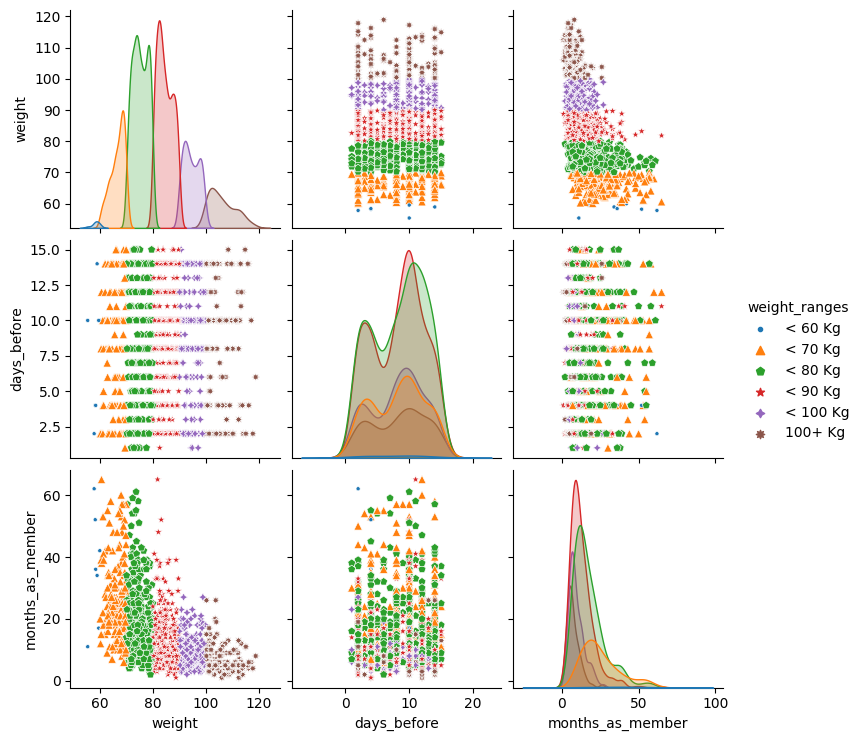

In [ ]:
sb.pairplot(df[['weight','days_before','months_as_member', 'weight_ranges']], hue="weight_ranges", markers=[".", "^", "p", "*", (4,1,0), (8,1,0),])

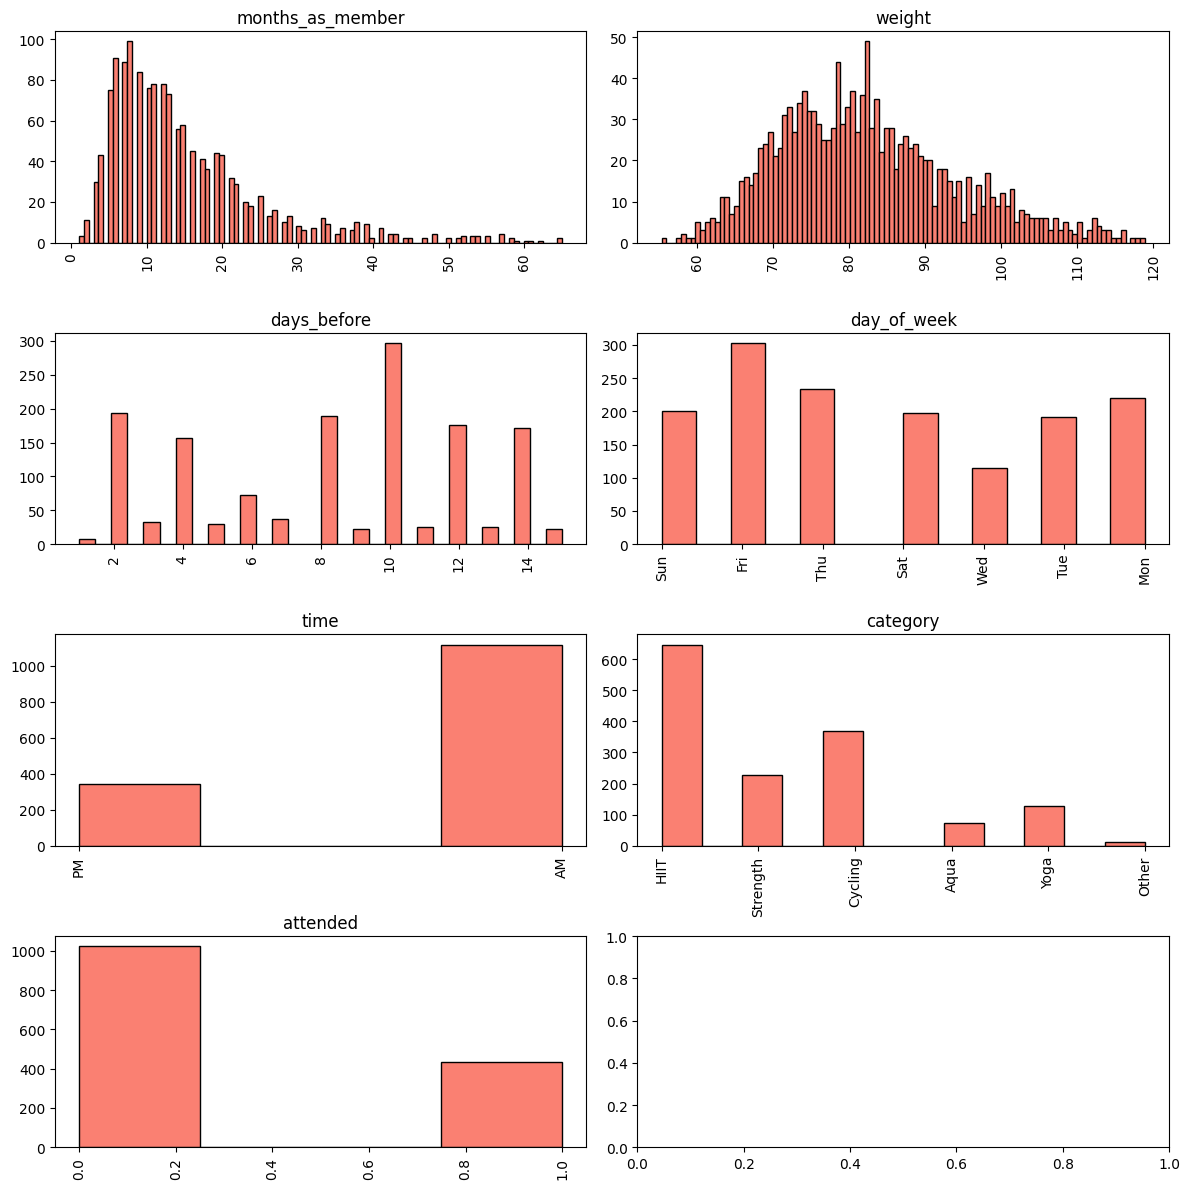

In [ ]:
plot_dist(df[:-2], df.columns[:-2])
#plot_dist(df[:], df.columns[:])

###---

In [ ]:
df.reset_index(drop=True, inplace=True)  # The reset_index method with drop=True will reset the indices to be continuous and remove the old indices
df

,months_as_member,weight,days_before,day_of_week,time,category,attended,weight_ranges,months_as_member_ranges
0,11,114.870000,15,Sun,PM,HIIT,0,100+ Kg,< 1 year
1,5,83.850000,15,Fri,PM,Strength,1,< 90 Kg,< 1 year
2,10,81.980000,15,Sun,PM,HIIT,0,< 90 Kg,< 1 year
3,25,84.040000,15,Sun,PM,Cycling,0,< 90 Kg,< 3 years
4,7,90.710000,15,Sun,PM,Aqua,1,< 100 Kg,< 1 year
...,...,...,...,...,...,...,...,...,...
1457,14,82.610378,1,Mon,PM,Aqua,0,< 90 Kg,< 2 years
1458,16,74.090000,1,Mon,PM,Cycling,1,< 80 Kg,< 2 years
1459,30,69.490000,1,Mon,PM,HIIT,1,< 70 Kg,< 3 years
1460,38,72.880000,1,Mon,PM,HIIT,0,< 80 Kg,< 4 years


In [ ]:
import pydot
from IPython.display import Image
from six import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay

%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

### Dummy variables

In [ ]:
# Dummy variables to be factorized
X =['day_of_week', 'time', 'category']


for elem in X:

    # Factorize
    # df[elem] = pd.factorize(df[elem])[0]   # df.elem = pd.factorize(df.elem)[0]

    # One-hot encoding
    df = pd.concat([df, pd.get_dummies(df[elem], prefix=elem)], axis=1)
    df.drop(elem, axis=1, inplace=True)

#df.income = pd.factorize(df.income)[0]


### Managing data

In [ ]:
# age workclass	fnlwgt	education	education.num	marital.status	occupation	relationship	race	sex	capital.gain	capital.loss	hours.per.week	native.country	income
# variables = ['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category',]  #  'weight_ranges', 'months_as_member_ranges']

exclude_columns = ['weight_ranges', 'months_as_member_ranges', 'attended']

# Use a list comprehension to filter out undesired columns
variables = [col for col in df.keys() if col not in exclude_columns]

print(variables)

#features_elements = [element for element in column_names if any(substring in element for substring in variables)]

features = df[variables]  # .values

target = df["attended"]  # series

# Visualization of variables
# print(f"{features}\n{target}")
# print(features.keys())
print(features.shape)

num_columns = ['months_as_member', 'weight', 'days_before',]
cat_columns = ['day_of_week', 'time', 'category']

features_num = df[num_columns]
print(features_num.columns)

#features_cat = df.drop(num_columns + list('attended',), axis=1)
features_cat = df[cat_columns]
print(features_cat.columns)

['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category']
(1462, 6)
Index(['months_as_member', 'weight', 'days_before'], dtype='object')
Index(['day_of_week', 'time', 'category'], dtype='object')


### Oversampling

In [ ]:
# Instantiate the SMOTE resampler
smote = SMOTE(sampling_strategy='auto', random_state=23)

features, target = smote.fit_resample(features, target)

print(features.shape)
print(target.shape)
#print(df)

### Splitting Data

In [ ]:
# Split data into train/test split
# (Xtr, Xte, ytr, yte) = train_test_split(features, target, test_size = 0.25, random_state=23)  # train_size = 0.75,
train_set, test_set = train_test_split(df, test_size=0.20, random_state=23)


split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=23)

for train_index, test_index in split.split(features, target):  # (df, df["attended"]):

    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Xtr = strat_train_set.drop("attended", axis=1)
ytr = strat_train_set["attended"]

Xte = strat_test_set.drop("attended", axis=1)
yte = strat_test_set["attended"]


# Check if proportions are mantained into test and train sets
print(f'\nStratified:\n{strat_test_set["attended"].value_counts() / len(strat_test_set)}')
print(strat_train_set["attended"].value_counts() / len(strat_train_set))

print(f'\nRandom:\n{train_set["attended"].value_counts() / len(train_set)}')
print(test_set["attended"].value_counts() / len(test_set))


Stratified:
0    0.699659
1    0.300341
Name: attended, dtype: float64
0    0.701454
1    0.298546
Name: attended, dtype: float64

Random:
0    0.70231
1    0.29769
Name: attended, dtype: float64
0    0.696246
1    0.303754
Name: attended, dtype: float64


#### Scaler

In [ ]:
# Create a MinMaxScaler and fit it to the training set
scaler = MinMaxScaler()
Xtr = scaler.fit_transform(Xtr)

### Pipeline

In [ ]:
# Pipeline list of (key, value) pairs - name of the step: estimator object

num_pipeline = Pipeline([
                        ('normalizer', MinMaxScaler()),
                        ])

num_attribs = list(features_num)
print(num_attribs)

cat_attribs = list(features_cat)
print(cat_attribs)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])

['months_as_member', 'weight', 'days_before']
['day_of_week', 'time', 'category']


In [ ]:
pipeline = Pipeline(steps=[('preprocessor',full_pipeline),
                           ('classifier',RandomForestClassifier(random_state=23)),
                          ])

In [ ]:
params =[
        {'preprocessor': [full_pipeline],
         'classifier': [LogisticRegression(random_state=23)],
         'classifier__penalty':['l2'],
        },

        {'preprocessor': [full_pipeline],
         'classifier': [DecisionTreeClassifier(max_depth=None, max_leaf_nodes=30)],
        },

        {'preprocessor': [full_pipeline],
         'classifier': [RandomForestClassifier(random_state=23)],  # n_estimators=10, max_features=40,
         'classifier__n_estimators': [50, 100],
         'classifier__min_samples_split': [5,10],
        },

        {'preprocessor': [full_pipeline],
         'classifier': [SGDClassifier(max_iter=1000, tol=1e-3, random_state=23)],
         'classifier__penalty':['l2'],
        },

        {'preprocessor': [full_pipeline],
         'classifier': [GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=23)],
        },
        ]

grid_search = GridSearchCV(pipeline, params, cv=4, verbose=10, n_jobs=-1,
                           scoring='roc_auc',
                           return_train_score=True)

grid_search.fit(Xtr, ytr)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('normalizer',
                                                                                          MinMaxScaler())]),
                                                                         ['months_as_member',
                                                                          'weight',
                                                                          'days_before']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['day_of_week',
                                                                          'time',
                                                                          'category'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=23))]),
             n_jobs=-1,
             param_grid=[{'classifier': [Log...
                         {'classifier': [GradientBoostingClassifier(learning_rate=0.01,
                                                                    n_estimators=500,
                                                                    random_state=23)],
                          'preprocessor': [ColumnTransformer(transformers=[('num',
                                                                            Pipeline(steps=[('normalizer',
                                                                                             MinMaxScaler())]),
                                                                            ['months_as_member',
                                                                             'weight',
                                                                             'days_before']),
                                                                           ('cat',
                                                                            OneHotEncoder(),
                                                                            ['day_of_week',
                                                                             'time',
                                                                             'category'])])]}],
             return_train_score=True, scoring='roc_auc', verbose=10)

In [ ]:
print(f"{grid_search.best_estimator_['classifier']}\n")
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_
feature_importances

attributes = num_attribs + cat_attribs
sorted(zip(feature_importances, attributes), reverse=True)


# Importance = pd.DataFrame({'Importance': feature_importances * 100}, index=attributes)
# sorted_importance = Importance.sort_values('Importance', axis=0, ascending=False)

# # Plot the top most important features
# top_importance = sorted_importance.head(20)
# top_importance.plot(kind='barh', color='g')
# plt.xlabel('Variable Importance')
# plt.gca().legend_ = None
# plt.show()

# # Print the top most important features
# print("Top Most Important Features:")
# print(top_importance)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,
                           random_state=23)



[(0.7746236762758938, 'months_as_member'),
 (0.11307873107581035, 'weight'),
 (0.04154662387334221, 'days_before'),
 (0.012880749926648536, 'category'),
 (0.002547112461909638, 'day_of_week'),
 (0.001997154781480253, 'time')]

In [ ]:
df_results = pd.DataFrame(grid_search.cv_results_)

df_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__penalty,param_preprocessor,param_classifier__min_samples_split,param_classifier__n_estimators,params,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
7,1.344587,0.014989,0.015630,0.002334,"GradientBoostingClassifier(learning_rate=0.01,...",NaN,"ColumnTransformer(transformers=[('num',\n ...",NaN,NaN,{'classifier': GradientBoostingClassifier(lear...,...,0.773619,0.802906,0.024704,1,0.879329,0.880736,0.882890,0.888717,0.882918,0.003580
0,0.065266,0.010349,0.022933,0.003669,LogisticRegression(random_state=23),l2,"ColumnTransformer(transformers=[('num',\n ...",NaN,NaN,{'classifier': LogisticRegression(random_state...,...,0.759069,0.799652,0.035017,2,0.817531,0.809862,0.822789,0.827419,0.819400,0.006524
6,0.022500,0.001888,0.010647,0.000779,SGDClassifier(random_state=23),l2,"ColumnTransformer(transformers=[('num',\n ...",NaN,NaN,"{'classifier': SGDClassifier(random_state=23),...",...,0.780207,0.791876,0.031289,3,0.798386,0.805660,0.805523,0.812015,0.805396,0.004823
5,0.353325,0.008283,0.027884,0.001569,RandomForestClassifier(random_state=23),NaN,"ColumnTransformer(transformers=[('num',\n ...",10,100,{'classifier': RandomForestClassifier(random_s...,...,0.715111,0.781965,0.039225,4,0.955730,0.957792,0.952585,0.957568,0.955919,0.002084
4,0.198275,0.003346,0.018564,0.000522,RandomForestClassifier(random_state=23),NaN,"ColumnTransformer(transformers=[('num',\n ...",10,50,{'classifier': RandomForestClassifier(random_s...,...,0.703729,0.776843,0.043137,5,0.956596,0.956532,0.951908,0.957941,0.955744,0.002285
3,0.418384,0.033523,0.028331,0.001539,RandomForestClassifier(random_state=23),NaN,"ColumnTransformer(transformers=[('num',\n ...",5,100,{'classifier': RandomForestClassifier(random_s...,...,0.707093,0.766374,0.035224,6,0.991814,0.994945,0.989934,0.989605,0.991574,0.002121
2,0.315599,0.073657,0.027460,0.007930,RandomForestClassifier(random_state=23),NaN,"ColumnTransformer(transformers=[('num',\n ...",5,50,{'classifier': RandomForestClassifier(random_s...,...,0.706448,0.765277,0.035076,7,0.991381,0.992534,0.988202,0.988562,0.990170,0.001838
1,0.036831,0.002196,0.020145,0.003408,DecisionTreeClassifier(max_leaf_nodes=30),NaN,"ColumnTransformer(transformers=[('num',\n ...",NaN,NaN,{'classifier': DecisionTreeClassifier(max_leaf...,...,0.698879,0.754276,0.037274,8,0.862966,0.859604,0.866282,0.873233,0.865521,0.005040


In [ ]:
df_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier', 'param_classifier__penalty', 'param_preprocessor',
       'param_classifier__min_samples_split', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

Classifier: LogisticRegression(random_state=23)
Mean accuracy score: 0.7582866334578664

Classifier: DecisionTreeClassifier(max_leaf_nodes=30)
Mean accuracy score: 0.7331776670817767

Classifier: RandomForestClassifier(random_state=23)
Mean accuracy score: 0.7445983810709838

Classifier: RandomForestClassifier(random_state=23)
Mean accuracy score: 0.7434723951847239

Classifier: RandomForestClassifier(random_state=23)
Mean accuracy score: 0.7411892901618928

Classifier: RandomForestClassifier(random_state=23)
Mean accuracy score: 0.7525996264009963

Classifier: SGDClassifier(random_state=23)
Mean accuracy score: 0.7434775840597757

Classifier: GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,
                           random_state=23)
Mean accuracy score: 0.7480230386052305


Confusion Matrix with best classifier: LogisticRegression(random_state=23)
[[193  12]
 [ 58  30]]



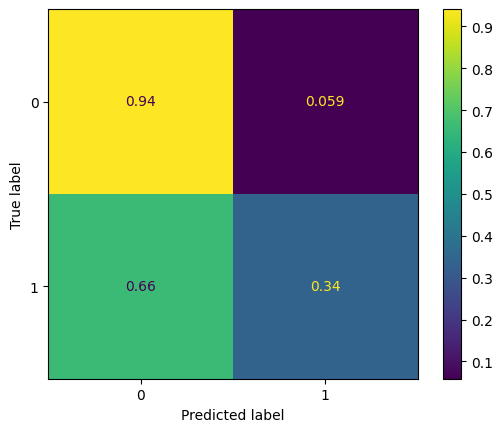

In [ ]:
for i, params in enumerate(grid_search.cv_results_['params']):
    #print(f"Parameters: {params}")
    print(f"Classifier: {params['classifier']}")
    print(f"Mean accuracy score: {grid_search.cv_results_['mean_test_score'][i]}\n")

print(f"\nConfusion Matrix with best classifier: {grid_search.best_estimator_['classifier']}")

y_pred = grid_search.best_estimator_.predict(Xte)

conf_matrix = confusion_matrix(yte, y_pred)
print(f"{conf_matrix}\n")  # confusion matrix contains 1/5 of the observations  in this case, since test set is 1/5 of observations

cm = confusion_matrix(np.asarray(yte).astype(int), np.asarray(y_pred).astype(int), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

By changing the proporions of train and test sets I can see that the accuracy is quite stable.

There is a tendency for outcome to be predicted "0".

Considering the unbalanced dataset, where much more records have values "0" as attendance, somehow models tend to learn to predict more often labels of lower value.